# 1. Multivariate_ARIMA

### 1.1 Set Path 

In [1]:
import os
from pathlib import Path

# Search for Current Directory and 'Data' folder

wd_path = Path.cwd()
data_folder = wd_path/'data'
print(data_folder)


/Users/slee/Desktop/ClarityEmission/data


In [2]:
import pandas as pd

# Load the datasets
training_data = pd.read_csv(data_folder/'training_data.csv')
validation_data = pd.read_csv(data_folder/'validation_data.csv')

In [3]:
# Display basic information of Data dataset - Training Data
print("'Training' data type:\n")
print(training_data.info())

print("\nDescribe 'Training' data:\n")
print(training_data.describe())

print("\nAny null values in 'Training' data?\n")
print(training_data.isnull().sum())

training_data.head()


'Training' data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18283 entries, 0 to 18282
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   clarity_id                    18283 non-null  object 
 1   metric                        18283 non-null  object 
 2   metric_year                   18283 non-null  int64  
 3   provider_code                 18283 non-null  object 
 4   clarity_industry_code         18283 non-null  object 
 5   clarity_industry_name         18283 non-null  object 
 6   country_code                  18283 non-null  object 
 7   co2directscope1_raw           18283 non-null  float64
 8   revenue                       18283 non-null  float64
 9   co2directscope1_intensity     18283 non-null  float64
 10  verification_co2directscope1  3249 non-null   float64
 11  targets_emissions             18130 non-null  float64
 12  policy_emissions              18261 n

,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
0,01FF543RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,NaN,100.0,100.0,100.0,100.0
1,01FF543SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,NaN,100.0,100.0,NaN,100.0
2,01FF543VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,NaN,100.0,100.0,NaN,1.0
3,01FF543T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,NaN,100.0,100.0,NaN,1.0
4,01FF543WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,NaN,100.0,100.0,NaN,1.0


In [4]:
# Display basic information of Dataset - Validation Data

print("'Validation' data type:\n")
print(validation_data.info())

print("\nDescribe 'Validation' data: \n")
print(validation_data.describe())

print("\nAny null values in 'Validataion' data?\n")
print(validation_data.isnull().sum())

validation_data.head()

'Validation' data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   clarity_id                    274 non-null    object 
 1   metric                        274 non-null    object 
 2   metric_year                   274 non-null    int64  
 3   provider_code                 274 non-null    object 
 4   clarity_industry_code         274 non-null    object 
 5   clarity_industry_name         274 non-null    object 
 6   country_code                  274 non-null    object 
 7   revenue                       274 non-null    float64
 8   verification_co2directscope1  112 non-null    float64
 9   targets_emissions             272 non-null    float64
 10  policy_emissions              274 non-null    int64  
 11  sbti_alignment                157 non-null    float64
 12  nz_statement                  228 non-n

,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,revenue,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
0,01FF543SNGPX2T1PCTPWBVYPVZ,CO2DIRECTSCOPE1,2022,TRC8,10102050/1,Coal,ZA,3.555365e+05,NaN,100.0,100,NaN,1.0
1,01FF543T4RNFQR4MHDTA2Z9NMD,CO2DIRECTSCOPE1,2022,TRC8,25101010/0,Automotive Parts & Equipment,FR,1.124621e+06,NaN,100.0,100,100.0,100.0
2,01FF543S91RD5557M4Z9D90R0Z,CO2DIRECTSCOPE1,2022,TRC8,20303010/0,Marine Transportation,GB,9.336822e+04,NaN,1.0,100,NaN,NaN
3,01FF543RY9KHBCTB2VRE62Y5P8,CO2DIRECTSCOPE1,2022,TRC8,10102020/0,Oil & Gas Exploration & Production,US,1.384390e+06,NaN,100.0,1,NaN,NaN
4,01FF543S41Z9FW4C1XYGNA4M2Y,CO2DIRECTSCOPE1,2019,TRC1,25504060/0,Homefurnishing Retail,ZA,5.598580e+04,NaN,1.0,100,NaN,NaN


### DataFrame naming convention: 
- df = training_data.csv; into dataframe
- df1 = df + categorical variable (CVnull) null replacement 
- CVnull: verification_co2directscope1, targets_emissions, policy_emissions, sbti_alignment, nz_statement)
- df2 = df1 + outlier removal post Boxplot Analysis
- df3

# 2 Data Preprocessing

In [5]:
# Following the sequence from 'ExploratoryDataAnalysis_complete.ipynb'
# 2 Exploratory Data Analysis
# 2.1 Individual Attribute Assessment - Quantitative and Categorical attributes

import matplotlib.pyplot as plt
import seaborn as sns

df = training_data
df.head()
df.describe()

,metric_year,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
count,18283.000000,1.828300e+04,1.828300e+04,1.828300e+04,3249.000000,18130.000000,18261.000000,10306.000000,15640.000000
mean,2013.756823,6.988744e+08,2.126782e+06,2.745235e+03,78.000000,88.183343,90.778216,79.250922,64.514450
std,4.631532,2.650456e+09,4.242650e+06,1.489643e+05,41.164567,32.097859,28.774306,40.296303,47.476197
min,2002.000000,1.500000e+01,-2.394059e+05,-1.497153e+02,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2010.000000,3.301042e+06,2.933084e+05,5.868195e+00,100.000000,100.000000,100.000000,100.000000,1.000000
50%,2014.000000,2.242975e+07,8.268900e+05,2.443638e+01,100.000000,100.000000,100.000000,100.000000,100.000000
75%,2017.000000,2.109640e+08,2.095284e+06,2.585699e+02,100.000000,100.000000,100.000000,100.000000,100.000000
max,2022.000000,1.642461e+11,6.549552e+07,1.810511e+07,100.000000,100.000000,100.000000,100.000000,100.000000


Handle missing values, create new features, and scale the data.

In [6]:
# Handle missing values: Five categorical variable bar charts for Missing Data (Impute or Disregard)
# ['verification_co2directscope1', 'targets_emissions', 'policy_emissions', 'sbti_alignment', 'nz_statement']
# # Conclusion: All the Null value in the five categorical variables will be treated as 1 (no).
# Fill NaN with 1 (= No) until each company delcaires otherwise
df1=df.copy()
df1['verification_co2directscope1']=df['verification_co2directscope1'].fillna(1)
df1['targets_emissions']=df['targets_emissions'].fillna(1)
df1['policy_emissions']=df['policy_emissions'].fillna(1)
df1['sbti_alignment']=df['sbti_alignment'].fillna(1)
df1['nz_statement']=df['nz_statement'].fillna(1)


# Check all the null values in the categorical values using .isnull()
print(df1.isnull().sum())

df1.head()
df1.describe()

clarity_id                      0
metric                          0
metric_year                     0
provider_code                   0
clarity_industry_code           0
clarity_industry_name           0
country_code                    0
co2directscope1_raw             0
revenue                         0
co2directscope1_intensity       0
verification_co2directscope1    0
targets_emissions               0
policy_emissions                0
sbti_alignment                  0
nz_statement                    0
dtype: int64


,metric_year,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
count,18283.000000,1.828300e+04,1.828300e+04,1.828300e+04,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000
mean,2013.756823,6.988744e+08,2.126782e+06,2.745235e+03,14.683367,87.453755,90.670185,45.109501,55.332768
std,4.631532,2.650456e+09,4.242650e+06,1.489643e+05,34.168445,32.935229,28.924937,49.206960,49.264867
min,2002.000000,1.500000e+01,-2.394059e+05,-1.497153e+02,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2010.000000,3.301042e+06,2.933084e+05,5.868195e+00,1.000000,100.000000,100.000000,1.000000,1.000000
50%,2014.000000,2.242975e+07,8.268900e+05,2.443638e+01,1.000000,100.000000,100.000000,1.000000,100.000000
75%,2017.000000,2.109640e+08,2.095284e+06,2.585699e+02,1.000000,100.000000,100.000000,100.000000,100.000000
max,2022.000000,1.642461e+11,6.549552e+07,1.810511e+07,100.000000,100.000000,100.000000,100.000000,100.000000


### DataFrame naming convention: 
- df = training_data.csv; into dataframe
- df1 = df + categorical variable (CVnull) null replacement 
- CVnull: verification_co2directscope1, targets_emissions, policy_emissions, sbti_alignment, nz_statement)
- df2 = df1 + outlier removal post Boxplot Analysis
- df3 = df2 for correlation 


In [7]:
# Outlier Removal from CO2 Direct Scope 1 Emission (Raw)
# Set the number of outliers to remove
raw_outliers_to_remove = 1 # There is 1 outlier values for id 01FF543RRCCWNHSF9RQKZQV785, 2008 data

# Create a copy of the dataframe to modify for this loop
df2 = df1.copy() # Outlier filtered/removed dataframe

# Remove the outliers for specified number of iterations
for _ in range(raw_outliers_to_remove):
    max_intensity_index = df2['co2directscope1_raw'].idxmax()
    df2 = df2.drop(max_intensity_index)


# Outlier Removal from CO2 Direct Scope 1 Emission Intensity

# Set the number of outliers to remove
intensity_outliers_to_remove = 8 # There are 8 outlier, entire company_id 01FF543T2JTRB6CHHBWXNNHMCB removed

# Remove the outliers for specified number of iterations
for _ in range(intensity_outliers_to_remove):
    max_intensity_index = df2['co2directscope1_intensity'].idxmax()
    df2 = df2.drop(max_intensity_index)


Outlier companies:

- '01FF543T2JTRB6CHHBWXNNHMCB' based in US in 'Life Sciecne & Tool' industry (ref: 2008, CO2 Intensity YoY Distribution)

Decision: removal of entire company from the population

- '01FF543RRCCWNHSF9RQKZQV785' based in IT in 'Integrated Oil & Gas' industry (ref: 2006, CO2 Raw YoY Distribution)

Decision: only 2006 data is removed from the population
    
- '01FF543RF8YC03TWZM17YSNKDN' based in US in 'Comsumer Staples Merchandise Retail' industry (ref: Revenue)

Decision: not an outlier that average CO2 intensity YoY is stable and have clear record of emission reporting

### DataFrame review 

- df = training_data.csv; into dataframe
- df1 = df + categorical variable (CVnull) null replacement 
- CVnull: verification_co2directscope1, targets_emissions, policy_emissions, sbti_alignment, nz_statement)
- df2 = df1 + outlier removal post Boxplot Analysis
- df3 = df2 for correlation, count of rows 18274
- d4 = Lasso & Random Forest
- d5 = Multivariate ARIMA model = df2

In [8]:
# df2 = df1 + df1 + outlier removal post Boxplot Analysis
df2.describe() #df2 count of rows 18274

,metric_year,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
count,18274.000000,1.827400e+04,1.827400e+04,18274.000000,18274.000000,18274.000000,18274.000000,18274.000000,18274.000000
mean,2013.758236,6.890416e+08,2.127193e+06,554.248516,14.690106,87.490916,90.708931,45.087884,55.354110
std,4.631828,2.358533e+09,4.242879e+06,1871.546253,34.175509,32.893485,28.871050,49.204588,49.262769
min,2002.000000,1.500000e+01,-2.394059e+05,-149.715310,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2010.000000,3.292165e+06,2.942546e+05,5.865630,1.000000,100.000000,100.000000,1.000000,1.000000
50%,2014.000000,2.237100e+07,8.271104e+05,24.381765,1.000000,100.000000,100.000000,1.000000,100.000000
75%,2017.750000,2.099254e+08,2.095369e+06,257.851373,1.000000,100.000000,100.000000,100.000000,100.000000
max,2022.000000,3.921215e+10,6.549552e+07,46416.960850,100.000000,100.000000,100.000000,100.000000,100.000000


In [12]:
# Carbon Intensive Industry

carbon_intensive_industry = df2.groupby('clarity_industry_name')['co2directscope1_raw'].mean().reset_index()

print("\nCount of Carbon Intensive Industry (threshold qunatile > 0.75): \n")
carbon_intensive_industry_1 = carbon_intensive_industry[carbon_intensive_industry['co2directscope1_raw']>1.396308e+08].dropna().sort_values(by='co2directscope1_raw', ascending=False)
print(carbon_intensive_industry_1['co2directscope1_raw'].count())

print("\nList of Carbon Intensive Industry (threshold qunatile > 0.75): \n")
print(carbon_intensive_industry_1)



Count of Carbon Intensive Industry (threshold qunatile > 0.75): 

39

List of Carbon Intensive Industry (threshold qunatile > 0.75): 

                              clarity_industry_name  co2directscope1_raw
51                               Electric Utilities         5.963271e+09
90                             Integrated Oil & Gas         5.317700e+09
54                 Electricity generation utilities         4.491816e+09
145                                           Steel         4.116252e+09
108                                 Multi-Utilities         3.467529e+09
24                                 Cement Producers         3.272365e+09
8                       Aluminum Primary Production         2.408800e+09
122                              Passenger Airlines         1.981064e+09
34                           Construction Materials         1.566266e+09
102                           Marine Transportation         1.409461e+09
43                            Diversified Chemicals         1

# 3. Data Preprocessing


In [13]:
# Output File

df5 = df2.copy()
df5.describe()
df5.head()


,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
0,01FF543RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,1.0,100.0,100.0,100.0,100.0
1,01FF543SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,1.0,100.0,100.0,1.0,100.0
2,01FF543VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,1.0,100.0,100.0,1.0,1.0
3,01FF543T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,1.0,100.0,100.0,1.0,1.0
4,01FF543WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,1.0,100.0,100.0,1.0,1.0


In [14]:
# Result of Data Preprocessing
# 1)
# Fill in NaN in categorical attributes (df2)
# Remove outliers (df2)

# 2)
# Update the categorical features into 1:0 from 100:1
# Update binary variables to 0 and 1
binary_vars = ['targets_emissions', 'verification_co2directscope1', 'sbti_alignment', 'nz_statement', 'policy_emissions']
df5[binary_vars] = df5[binary_vars].replace({100: 1, 1: 0})
# print(df5.head())

# 3)
# Add carbon_intensiveness category to the data, 1:0 where,
# 1: Production Industry, that is Carbon Intensive Industry
# 0: Service Industry, that does not have proportional revenue growth with co2directscope1 emission. 
# List of Carbon Intensive industry: 
# print(carbon_intensive_industry_1['clarity_industry_name'])

df5 = df5.assign(industry_type_carbonIntensive=lambda x: x['clarity_industry_name'].isin(carbon_intensive_industry_1['clarity_industry_name']).astype(int))

# df5['industry_type_carbonIntensive'] = df5['clarity_industry_name'].replace(carbon_intensive_industry_1['clarity_industry_name'], '1', inplace=True)
df5




,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement,industry_type_carbonIntensive
0,01FF543RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,0.0,1.0,1.0,1.0,1.0,0
1,01FF543SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,0.0,1.0,1.0,0.0,1.0,1
2,01FF543VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,0.0,1.0,1.0,0.0,0.0,0
3,01FF543T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,0.0,1.0,1.0,0.0,0.0,0
4,01FF543WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18278,01FF543TV1945KQABRS1C384F3,CO2DIRECTSCOPE1,2013,TRC8,15103020/0,Paper & Plastic Packaging Products & Materials,US,9.041720e+07,6.054511e+05,149.338558,0.0,1.0,1.0,1.0,0.0,1
18279,01FF543TX2P68HZZMWDK5B7VDJ,CO2DIRECTSCOPE1,2022,TRC8,35202010/0,Pharmaceuticals,DK,9.726867e+06,3.132677e+06,3.104970,0.0,1.0,1.0,1.0,1.0,0
18280,01FF543VTDN6SD28ZKHAFZ5HR0,CO2DIRECTSCOPE1,2018,TRC1,40101010/0,Diversified Banks,BR,2.440149e+06,6.729660e+06,0.362596,1.0,1.0,1.0,0.0,1.0,0
18281,01FF543T0110QHQZN81534DY61,CO2DIRECTSCOPE1,2019,TRC8,10102010/0,Integrated Oil & Gas,NO,1.962682e+09,7.531519e+06,260.595799,1.0,1.0,1.0,0.0,1.0,1


In [15]:
# Extracting only relevant column
df5_subset = df5[['clarity_id','metric_year', 'clarity_industry_name', 'country_code','co2directscope1_raw', 'revenue', 'co2directscope1_intensity','verification_co2directscope1','targets_emissions','policy_emissions','sbti_alignment','nz_statement','industry_type_carbonIntensive']]
df5_ARIMA = df5[['clarity_id','metric_year', 'clarity_industry_name', 'country_code','co2directscope1_raw', 'revenue', 'sbti_alignment','nz_statement','industry_type_carbonIntensive']]
df5_ARIMA = df5.rename(columns={'clarity_id':'company_id', 'clarity_industry_name':'industry_name'})
df5_ARIMA['company_id']=df5_ARIMA['company_id'].str[7:]
df5_ARIMA.head()
# Output into a file with replacing 'clarity_id'
# df4.to_csv(os.path.join('data','df4_FeatureAnalysis.csv'))
# df5_ARIMA.to_csv(os.path.join('data','df5_ARIMA.csv'))


,company_id,metric,metric_year,provider_code,clarity_industry_code,industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement,industry_type_carbonIntensive
0,RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,0.0,1.0,1.0,1.0,1.0,0
1,SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,0.0,1.0,1.0,0.0,1.0,1
2,VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,0.0,1.0,1.0,0.0,0.0,0
3,T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,0.0,1.0,1.0,0.0,0.0,0
4,WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,0.0,1.0,1.0,0.0,0.0,1


# 4. FORECASTING

## 4.1 ARIMA

In [16]:
# ARIMA - Multivariate: predict a 'company_id' specific 'co2directscope1_raw' 
# using 'revenue', 'industry_type_carbonIntensive', 'country_code' as parameters

# Import modules
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

import math
import numpy as np

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import OneHotEncoder

# Data used for Auto-ARIMA on Multivariate Time Series 
df_ARIMA = df5_subset

df_ARIMA.head()

,clarity_id,metric_year,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement,industry_type_carbonIntensive
0,01FF543RN5MZWC981FMFGMM6E4,2017,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,0.0,1.0,1.0,1.0,1.0,0
1,01FF543SRJYTXND0M7XQC1TP4J,2005,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,0.0,1.0,1.0,0.0,1.0,1
2,01FF543VB1A9CJMHM3ECG1RB6Z,2014,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,0.0,1.0,1.0,0.0,0.0,0
3,01FF543T095C9344VSA8AX6M7X,2017,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,0.0,1.0,1.0,0.0,0.0,0
4,01FF543WBGY98G1H88BVQG93P0,2008,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,0.0,1.0,1.0,0.0,0.0,1


In [17]:
df_ARIMA.isna().sum()

clarity_id                       0
metric_year                      0
clarity_industry_name            0
country_code                     0
co2directscope1_raw              0
revenue                          0
co2directscope1_intensity        0
verification_co2directscope1     0
targets_emissions                0
policy_emissions                 0
sbti_alignment                   0
nz_statement                     0
industry_type_carbonIntensive    0
dtype: int64

In [18]:
## SKIP ##
# Add a column to capture fuel intensity characteristics of the industry 
# Industry that are 'production' vs 'serivce' based business operations will have either high or lower correlation between Revenue and Energy consumption
# Column 'industry_type_carbonIntensive' = [1, 0] have been added

# X_production for product/production/energy instensive company, where 'industry_type_carbonIntensive'=1
# X_service for serivce industry, where 'industry_type_carbonIntensive'=0

X_service = df_ARIMA[df_ARIMA['industry_type_carbonIntensive']==1]
y_service = X_service['co2directscope1_intensity']
# print(X_service.head())


X_production = df_ARIMA[df_ARIMA['industry_type_carbonIntensive']==0]
y_production = X_production['co2directscope1_intensity']
# print(X_production.head())

# Split the data into training and testing sets
X_service_train, X_service_test, y_service_train, y_service_test = train_test_split(X_service,y_service, test_size=0.2, random_state=42)
# print("X_service_train:", X_service_train)

X_production_train, X_production_test, y_production_train, y_production_test = train_test_split(X_production,y_production, test_size=0.2, random_state=42)
# print("X_production_train:", X_production_train)

In [20]:
# Set metric_year as the index and sort the data (1,1,1)
df_ARIMA.set_index('metric_year', inplace=True)
df_ARIMA.sort_index(inplace = True)

# One-hot encode the 'country_code' column 
encoder = OneHotEncoder(drop='first', sparse=False)
country_code_encoded = encoder.fit_transform(df5_subset[['country_code']])
country_code_df = pd.DataFrame(country_code_encoded, 
                               index=df5_subset.index, 
                               columns=encoder.get_feature_names_out(['country_code']))

# Combine encoded 'country_code' with other exogenous variables
exog = pd.concat([df5_subset[['revenue', 'industry_type_carbonIntensive']], country_code_df], axis=1)

# Prepare the target variable
endog = df_ARIMA['co2directscope1_raw']

# Fit the ARIMAX model
model111 = ARIMA(endog, exog=exog, order=(1, 1, 1))
model111_fit = model111.fit()

# Display the model summary
model111_summary = model111_fit.summary()
model111_summary

/var/folders/f0/0cyn3lrn70ldzf29tngdjx380000gn/T/ipykernel_19499/720655690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ARIMA.sort_index(inplace = True)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(1, 1, 1)   Log Likelihood             -417853.158
Date:                 Thu, 11 Jul 2024   AIC                         835828.316
Time:                         00:15:57   BIC                         836304.920
Sample:                              0   HQIC                        835984.930
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
revenue                         114.0696      1.920     59.422      0.000     110.307     117.832
industry_type_carbonIntensive  1.543e+09   2.34e-08   6.58e+16      0.000    1.54e+09    1.54e+09
country_code_AU                2.642e+08   1.74e-09   1.52e+17      0.000    2.64e+08    2.64e+08
country_code_BE                1.749e+08   4.24e-10   4.12e+17      0.000    1.75e+08    1.75e+08
country_code_BM                 2.41e+08   1.14e-10   2.12e+18      0.000    2.41e+08    2.41e+08
country_code_BR                5.879e+08    8.3e-10   7.08e+17      0.000    5.88e+08    5.88e+08
country_code_CA                3.752e+08   2.17e-09   1.73e+17      0.000    3.75e+08    3.75e+08
country_code_CH                6.597e+08   2.05e-09   3.22e+17      0.000     6.6e+08     6.6e+08
country_code_CL                8.801e+08   1.11e-10   7.91e+18      0.000     8.8e+08     8.8e+08
country_code_CN                6.481e+08   3.89e-11   1.67e+19      0.000    6.48e+08    6.48e+08
country_code_CO               -1.541e+08   6.77e-11  -2.28e+18      0.000   -1.54e+08   -1.54e+08
country_code_CW               -9.486e+08   3.81e-11  -2.49e+19      0.000   -9.49e+08   -9.49e+08
country_code_CY                7.066e+08   3.47e-11   2.03e+19      0.000    7.07e+08    7.07e+08
country_code_CZ                2.679e+09   4.33e-11   6.19e+19      0.000    2.68e+09    2.68e+09
country_code_DE                9.794e+08   6.97e-09    1.4e+17      0.000    9.79e+08    9.79e+08
country_code_DK                4.496e+08   6.73e-10   6.68e+17      0.000     4.5e+08     4.5e+08
country_code_ES                7.482e+08   1.35e-09   5.56e+17      0.000    7.48e+08    7.48e+08
country_code_FI                2.902e+08   8.71e-10   3.33e+17      0.000     2.9e+08     2.9e+08
country_code_FR                8.368e+08   1.73e-09   4.82e+17      0.000    8.37e+08    8.37e+08
country_code_GB                4.101e+08   2.64e-09   1.55e+17      0.000     4.1e+08     4.1e+08
country_code_GR                1.579e+09   4.06e-10   3.89e+18      0.000    1.58e+09    1.58e+09
country_code_HK                2.132e+09   2.11e-09   1.01e+18      0.000    2.13e+09    2.13e+09
country_code_HR                9.242e+08    1.8e-11   5.13e+19      0.000    9.24e+08    9.24e+08
country_code_HU                5.244e+08   9.11e-11   5.76e+18      0.000    5.24e+08    5.24e+08
country_code_ID               -8.144e+05   1.02e-10  -8.01e+15      0.000   -8.14e+05   -8.14e+05
country_code_IE                1.085e+08   5.59e-10   1.94e+17      0.000    1.08e+08    1.08e+08
country_code_IL               -1.121e+08   6.85e-11  -1.64e+18      0.000   -1.12e+08   -1.12e+08
country_code_IN                2.599e+09   3.13e-09    8.3e+17      0.000     2.6e+09     2.6e+09
country_code_IT                1.157e+09   1.33e-09   8.72e+17      0.000    1.16e+09    1.16e+09
country_code_JE               -2.929e+08   1.27e-10   -2.3e+18      0.000   -2.93e+08   -2.93e+0

In [21]:
# print(fcast_model111.summary_frame(alpha=0.1))

In [22]:
# Fit the ARIMAX model
model210 = ARIMA(endog, exog=exog, order=(2, 1, 0))
model210_fit = model210.fit()

# Display the model summary
model210_summary = model210_fit.summary()
model210_summary

/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(2, 1, 0)   Log Likelihood             -420283.103
Date:                 Thu, 11 Jul 2024   AIC                         840688.205
Time:                         00:16:56   BIC                         841164.809
Sample:                              0   HQIC                        840844.820
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
revenue                         114.0337      1.819     62.705      0.000     110.469     117.598
industry_type_carbonIntensive  1.543e+09   3.52e-08   4.38e+16      0.000    1.54e+09    1.54e+09
country_code_AU                2.642e+08   3.34e-09   7.92e+16      0.000    2.64e+08    2.64e+08
country_code_BE                1.749e+08   2.37e-09   7.38e+16      0.000    1.75e+08    1.75e+08
country_code_BM                 2.41e+08   3.16e-10   7.63e+17      0.000    2.41e+08    2.41e+08
country_code_BR                5.879e+08   1.86e-09   3.16e+17      0.000    5.88e+08    5.88e+08
country_code_CA                3.752e+08   1.55e-09   2.42e+17      0.000    3.75e+08    3.75e+08
country_code_CH                6.597e+08   7.92e-10   8.33e+17      0.000     6.6e+08     6.6e+08
country_code_CL                8.801e+08   5.23e-10   1.68e+18      0.000     8.8e+08     8.8e+08
country_code_CN                6.481e+08   7.55e-11   8.59e+18      0.000    6.48e+08    6.48e+08
country_code_CO               -1.541e+08      8e-13  -1.93e+20      0.000   -1.54e+08   -1.54e+08
country_code_CW               -9.486e+08    1.6e-09  -5.92e+17      0.000   -9.49e+08   -9.49e+08
country_code_CY                7.066e+08    4.1e-11   1.72e+19      0.000    7.07e+08    7.07e+08
country_code_CZ                2.679e+09   1.75e-11   1.53e+20      0.000    2.68e+09    2.68e+09
country_code_DE                9.794e+08   8.74e-09   1.12e+17      0.000    9.79e+08    9.79e+08
country_code_DK                4.496e+08   1.22e-09   3.69e+17      0.000     4.5e+08     4.5e+08
country_code_ES                7.482e+08   2.45e-09   3.06e+17      0.000    7.48e+08    7.48e+08
country_code_FI                2.902e+08   1.69e-09   1.71e+17      0.000     2.9e+08     2.9e+08
country_code_FR                8.368e+08   3.57e-09   2.35e+17      0.000    8.37e+08    8.37e+08
country_code_GB                4.101e+08   3.25e-09   1.26e+17      0.000     4.1e+08     4.1e+08
country_code_GR                1.579e+09   5.37e-10   2.94e+18      0.000    1.58e+09    1.58e+09
country_code_HK                2.132e+09   5.14e-10   4.14e+18      0.000    2.13e+09    2.13e+09
country_code_HR                9.242e+08    3.7e-12   2.49e+20      0.000    9.24e+08    9.24e+08
country_code_HU                5.244e+08   9.18e-11   5.71e+18      0.000    5.24e+08    5.24e+08
country_code_ID               -8.144e+05   8.74e-11  -9.32e+15      0.000   -8.14e+05   -8.14e+05
country_code_IE                1.085e+08   3.85e-10   2.82e+17      0.000    1.08e+08    1.08e+08
country_code_IL               -1.121e+08    9.6e-13  -1.17e+20      0.000   -1.12e+08   -1.12e+08
country_code_IN                2.599e+09   3.93e-09   6.62e+17      0.000     2.6e+09     2.6e+09
country_code_IT                1.157e+09   1.53e-09   7.55e+17      0.000    1.16e+09    1.16e+09
country_code_JE               -2.929e+08   2.54e-10  -1.15e+18      0.000   -2.93e+08   -2.93e+0

In [23]:
# Fit the ARIMAX model
model302 = ARIMA(endog, exog=exog, order=(3, 0, 2))
model302_fit = model302.fit()

# Display the model summary
model302_summary = model302_fit.summary()
model302_summary

/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/slee/opt/anaconda3/

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(3, 0, 2)   Log Likelihood             -417690.077
Date:                 Thu, 11 Jul 2024   AIC                         835510.154
Time:                         00:17:43   BIC                         836018.015
Sample:                              0   HQIC                        835677.040
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -8.994e+08   7.62e-07  -1.18e+15      0.000   -8.99e+08   -8.99e+08
revenue                         114.4229      1.346     85.023      0.000     111.785     117.061
industry_type_carbonIntensive  1.546e+09   7.62e-07   2.03e+15      0.000    1.55e+09    1.55e+09
country_code_AU                4.259e+08        nan        nan        nan         nan         nan
country_code_BE                 4.91e+08        nan        nan        nan         nan         nan
country_code_BM                3.934e+08   2.93e-09   1.34e+17      0.000    3.93e+08    3.93e+08
country_code_BR                 6.28e+08   2.22e-08   2.83e+16      0.000    6.28e+08    6.28e+08
country_code_CA                4.365e+08    1.6e-08   2.72e+16      0.000    4.37e+08    4.37e+08
country_code_CH                7.616e+08    3.1e-08   2.45e+16      0.000    7.62e+08    7.62e+08
country_code_CL                5.134e+08   3.47e-10   1.48e+18      0.000    5.13e+08    5.13e+08
country_code_CN                1.527e+09   6.04e-10   2.53e+18      0.000    1.53e+09    1.53e+09
country_code_CO                2.011e+08   3.03e-11   6.64e+18      0.000    2.01e+08    2.01e+08
country_code_CW               -8.843e+08   2.42e-10  -3.65e+18      0.000   -8.84e+08   -8.84e+08
country_code_CY                1.619e+09   1.68e-09   9.65e+17      0.000    1.62e+09    1.62e+09
country_code_CZ                3.205e+09    6.9e-10   4.65e+18      0.000     3.2e+09     3.2e+09
country_code_DE                1.032e+09   6.91e-07   1.49e+15      0.000    1.03e+09    1.03e+09
country_code_DK                5.419e+08   1.86e-09   2.92e+17      0.000    5.42e+08    5.42e+08
country_code_ES                8.656e+08   3.47e-08   2.49e+16      0.000    8.66e+08    8.66e+08
country_code_FI                 3.37e+08   5.96e-09   5.66e+16      0.000    3.37e+08    3.37e+08
country_code_FR                9.594e+08   3.71e-07   2.59e+15      0.000    9.59e+08    9.59e+08
country_code_GB                5.436e+08   3.41e-08    1.6e+16      0.000    5.44e+08    5.44e+08
country_code_GR                1.575e+09   1.98e-09   7.95e+17      0.000    1.57e+09    1.57e+09
country_code_HK                2.017e+09   5.04e-08      4e+16      0.000    2.02e+09    2.02e+09
country_code_HR                8.844e+08   8.07e-12    1.1e+20      0.000    8.84e+08    8.84e+08
country_code_HU                5.618e+08      3e-10   1.87e+18      0.000    5.62e+08    5.62e+08
country_code_ID                1.274e+08    3.8e-10   3.35e+17      0.000    1.27e+08    1.27e+08
country_code_IE                8.018e+07   5.94e-09   1.35e+16      0.000    8.02e+07    8.02e+07
country_code_IL                1.925e+07   3.66e-10   5.25e+16      0.000    1.93e+07    1.93e+07
country_code_IN                2.565e+09   3.62e-07   7.09e+15      0.000    2.56e+09    2.56e+09
country_code_IT                 1.23e+09   4.42e-07   2.78e+15      0.000    1.23e+09    1.23e+0

In [24]:
# Fit the ARIMAX model
model303 = ARIMA(endog, exog=exog, order=(3, 0, 3))
model303_fit = model303.fit()

# Display the model summary
model303_summary = model303_fit.summary()
model303_summary

/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(3, 0, 3)   Log Likelihood             -417653.652
Date:                 Thu, 11 Jul 2024   AIC                         835439.305
Time:                         00:21:11   BIC                         835954.978
Sample:                              0   HQIC                        835608.757
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -8.994e+08        nan        nan        nan         nan         nan
revenue                         114.4670      1.560     73.398      0.000     111.410     117.524
industry_type_carbonIntensive  1.546e+09   1.87e-07   8.28e+15      0.000    1.55e+09    1.55e+09
country_code_AU                4.259e+08        nan        nan        nan         nan         nan
country_code_BE                 4.91e+08   5.46e-07   8.99e+14      0.000    4.91e+08    4.91e+08
country_code_BM                3.934e+08   6.35e-08   6.19e+15      0.000    3.93e+08    3.93e+08
country_code_BR                 6.28e+08        nan        nan        nan         nan         nan
country_code_CA                4.365e+08    1.7e-09   2.57e+17      0.000    4.37e+08    4.37e+08
country_code_CH                7.616e+08   1.56e-09   4.87e+17      0.000    7.62e+08    7.62e+08
country_code_CL                5.134e+08   8.72e-11   5.89e+18      0.000    5.13e+08    5.13e+08
country_code_CN                1.527e+09   3.16e-11   4.83e+19      0.000    1.53e+09    1.53e+09
country_code_CO                2.011e+08   4.85e-11   4.14e+18      0.000    2.01e+08    2.01e+08
country_code_CW               -8.843e+08   6.95e-11  -1.27e+19      0.000   -8.84e+08   -8.84e+08
country_code_CY                1.619e+09    2.2e-11   7.35e+19      0.000    1.62e+09    1.62e+09
country_code_CZ                3.205e+09   3.12e-11   1.03e+20      0.000     3.2e+09     3.2e+09
country_code_DE                1.032e+09   5.41e-09   1.91e+17      0.000    1.03e+09    1.03e+09
country_code_DK                5.419e+08   4.12e-10   1.31e+18      0.000    5.42e+08    5.42e+08
country_code_ES                8.656e+08   1.09e-09   7.92e+17      0.000    8.66e+08    8.66e+08
country_code_FI                 3.37e+08      6e-10   5.62e+17      0.000    3.37e+08    3.37e+08
country_code_FR                9.594e+08    1.5e-09   6.41e+17      0.000    9.59e+08    9.59e+08
country_code_GB                5.436e+08   2.01e-09    2.7e+17      0.000    5.44e+08    5.44e+08
country_code_GR                1.575e+09   2.79e-10   5.64e+18      0.000    1.57e+09    1.57e+09
country_code_HK                2.017e+09   1.71e-09   1.18e+18      0.000    2.02e+09    2.02e+09
country_code_HR                8.844e+08   1.48e-11   5.96e+19      0.000    8.84e+08    8.84e+08
country_code_HU                5.618e+08   6.97e-11   8.06e+18      0.000    5.62e+08    5.62e+08
country_code_ID                1.274e+08   7.81e-11   1.63e+18      0.000    1.27e+08    1.27e+08
country_code_IE                8.018e+07   4.17e-10   1.92e+17      0.000    8.02e+07    8.02e+07
country_code_IL                1.925e+07   5.23e-11   3.68e+17      0.000    1.93e+07    1.93e+07
country_code_IN                2.565e+09   2.46e-09   1.04e+18      0.000    2.56e+09    2.56e+09
country_code_IT                 1.23e+09   9.77e-10   1.26e+18      0.000    1.23e+09    1.23e+0

In [25]:
# Fit the ARIMAX model
model304 = ARIMA(endog, exog=exog, order=(3, 0, 4))
model304_fit = model304.fit()

# Display the model summary
model304_summary = model304_fit.summary()
model304_summary

/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(3, 0, 4)   Log Likelihood             -417684.603
Date:                 Thu, 11 Jul 2024   AIC                         835503.206
Time:                         00:21:55   BIC                         836026.693
Sample:                              0   HQIC                        835675.226
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -8.994e+08    6.1e-08  -1.47e+16      0.000   -8.99e+08   -8.99e+08
revenue                         114.4229      1.358     84.251      0.000     111.761     117.085
industry_type_carbonIntensive  1.546e+09   6.05e-08   2.55e+16      0.000    1.55e+09    1.55e+09
country_code_AU                4.259e+08   1.15e-10   3.71e+18      0.000    4.26e+08    4.26e+08
country_code_BE                 4.91e+08   2.24e-11   2.19e+19      0.000    4.91e+08    4.91e+08
country_code_BM                3.934e+08        nan        nan        nan         nan         nan
country_code_BR                 6.28e+08   5.12e-10   1.23e+18      0.000    6.28e+08    6.28e+08
country_code_CA                4.365e+08   1.61e-10   2.71e+18      0.000    4.37e+08    4.37e+08
country_code_CH                7.616e+08   1.21e-09   6.31e+17      0.000    7.62e+08    7.62e+08
country_code_CL                5.134e+08   1.28e-11   4.02e+19      0.000    5.13e+08    5.13e+08
country_code_CN                1.527e+09   2.15e-12   7.09e+20      0.000    1.53e+09    1.53e+09
country_code_CO                2.011e+08   4.61e-12   4.36e+19      0.000    2.01e+08    2.01e+08
country_code_CW               -8.843e+08   3.22e-11  -2.74e+19      0.000   -8.84e+08   -8.84e+08
country_code_CY                1.619e+09   3.69e-12   4.39e+20      0.000    1.62e+09    1.62e+09
country_code_CZ                3.205e+09   2.99e-12   1.07e+21      0.000     3.2e+09     3.2e+09
country_code_DE                1.032e+09   9.55e-09   1.08e+17      0.000    1.03e+09    1.03e+09
country_code_DK                5.419e+08   4.81e-11   1.13e+19      0.000    5.42e+08    5.42e+08
country_code_ES                8.656e+08   9.82e-11   8.82e+18      0.000    8.66e+08    8.66e+08
country_code_FI                 3.37e+08   4.45e-11   7.57e+18      0.000    3.37e+08    3.37e+08
country_code_FR                9.594e+08   4.22e-09   2.27e+17      0.000    9.59e+08    9.59e+08
country_code_GB                5.436e+08   2.32e-09   2.34e+17      0.000    5.44e+08    5.44e+08
country_code_GR                1.575e+09    4.9e-12   3.21e+20      0.000    1.57e+09    1.57e+09
country_code_HK                2.017e+09   6.81e-10   2.96e+18      0.000    2.02e+09    2.02e+09
country_code_HR                8.844e+08   2.68e-12    3.3e+20      0.000    8.84e+08    8.84e+08
country_code_HU                5.618e+08   7.66e-12   7.34e+19      0.000    5.62e+08    5.62e+08
country_code_ID                1.274e+08   4.01e-12   3.18e+19      0.000    1.27e+08    1.27e+08
country_code_IE                8.018e+07   2.08e-11   3.86e+18      0.000    8.02e+07    8.02e+07
country_code_IL                1.925e+07   1.11e-12   1.73e+19      0.000    1.93e+07    1.93e+07
country_code_IN                2.565e+09      2e-09   1.28e+18      0.000    2.56e+09    2.56e+09
country_code_IT                 1.23e+09   2.58e-09   4.78e+17      0.000    1.23e+09    1.23e+0

In [26]:
# predictions = model2.predict(start=len(y_train), end=len(y_train)+len(y_test) - 1, exog=x_test)
# mse = mean_squared_error(y_test, predictions)
# print(mse)
# print(predictions)

In [ ]:
-----------------------------------------------------------

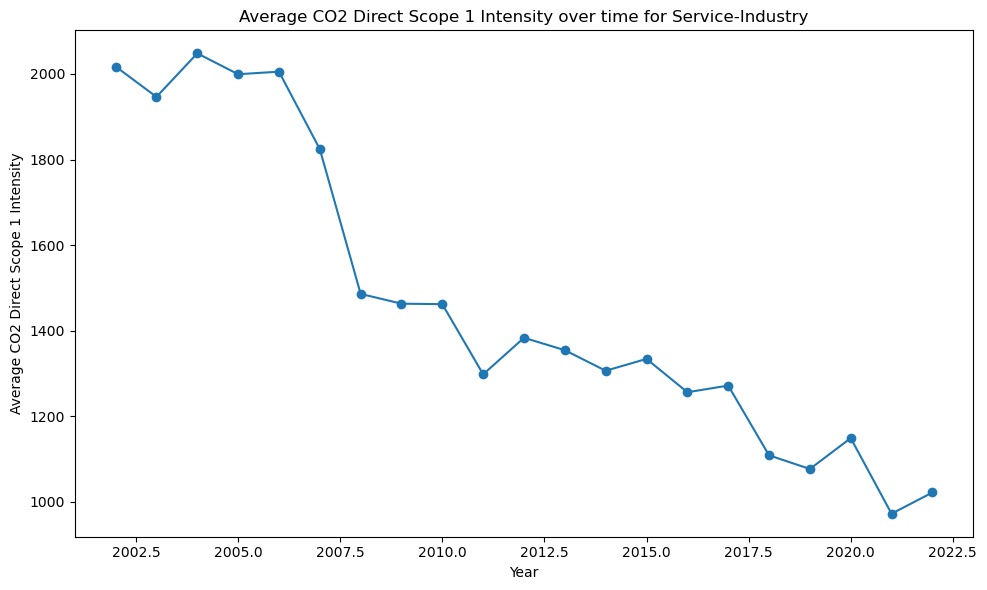

In [27]:
# Single Variable ARIMA


# Service Industry & ARIMA (1)
# Only keep the year and avg of co2directscope1_intensity

grouped_X_service = X_service.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()

# plot the time series
plt.figure(figsize=(10,6))
plt.plot(grouped_X_service['metric_year'], grouped_X_service['co2directscope1_intensity'],marker ='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average CO2 Direct Scope 1 Intensity')
plt.title('Average CO2 Direct Scope 1 Intensity over time for Service-Industry')

# Show the plot
plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -105.059
Date:                Thu, 11 Jul 2024   AIC                            214.119
Time:                        00:22:13   BIC                            215.785
Sample:                             0   HQIC                           214.284
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1486      0.418      0.355      0.722      -0.671       0.968
sigma2       1.36e+04   7249.042      1.877      0.061    -602.939    2.78e+04
Ljung-Box (L1) (Q):                   0.80   Jarque-

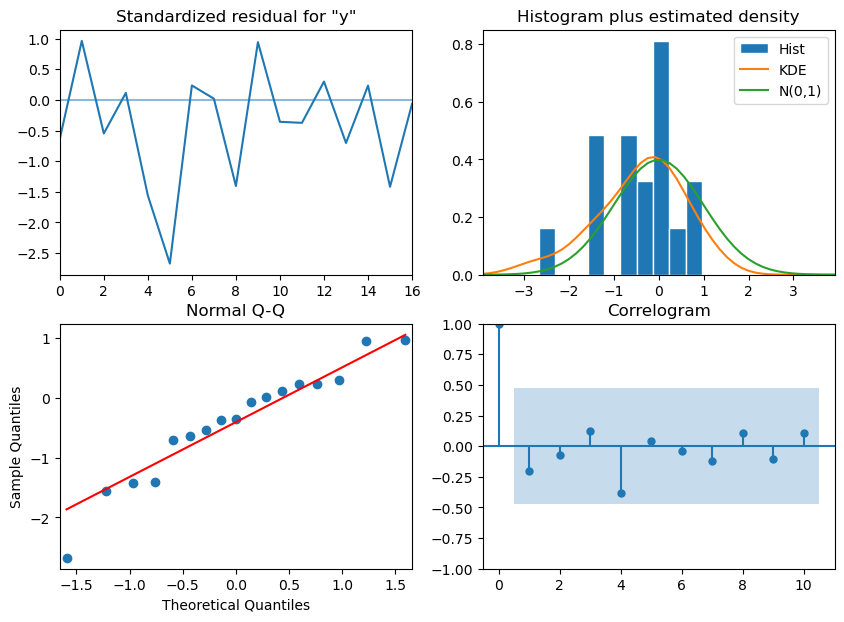

In [28]:
# Service Industry & ARIMA (2)

train_grouped_X_service, test_grouped_X_service = grouped_X_service[0:int(len(grouped_X_service)*0.9)], grouped_X_service[int(len(grouped_X_service)*0.9):]
train_grouped_X_service

train_arima = train_grouped_X_service['co2directscope1_intensity']
test_arima = test_grouped_X_service['co2directscope1_intensity']

history = [x for x in train_arima]
y = test_arima

# Make first prediction

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(10,7))
plt.show()


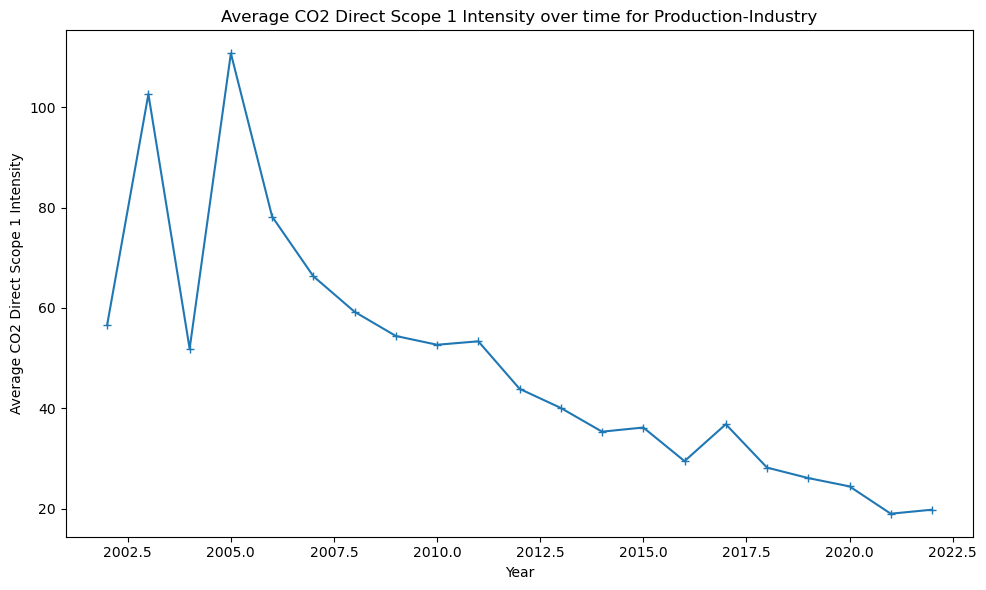

In [29]:
# Production Industry & ARIMA 
# Only keep the year and avg of co2directscope1_intensity

grouped_X_production = X_production.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()

# plot the time series
plt.figure(figsize=(10,6))
plt.plot(grouped_X_production['metric_year'], grouped_X_production['co2directscope1_intensity'], marker ='+')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average CO2 Direct Scope 1 Intensity')
plt.title('Average CO2 Direct Scope 1 Intensity over time for Production-Industry')

# Show the plot
plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -70.528
Date:                Thu, 11 Jul 2024   AIC                            145.057
Time:                        00:22:23   BIC                            146.723
Sample:                             0   HQIC                           145.223
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8182      0.103     -7.960      0.000      -1.020      -0.617
sigma2       220.1240     68.765      3.201      0.001      85.348     354.900
Ljung-Box (L1) (Q):                   0.05   Jarque-

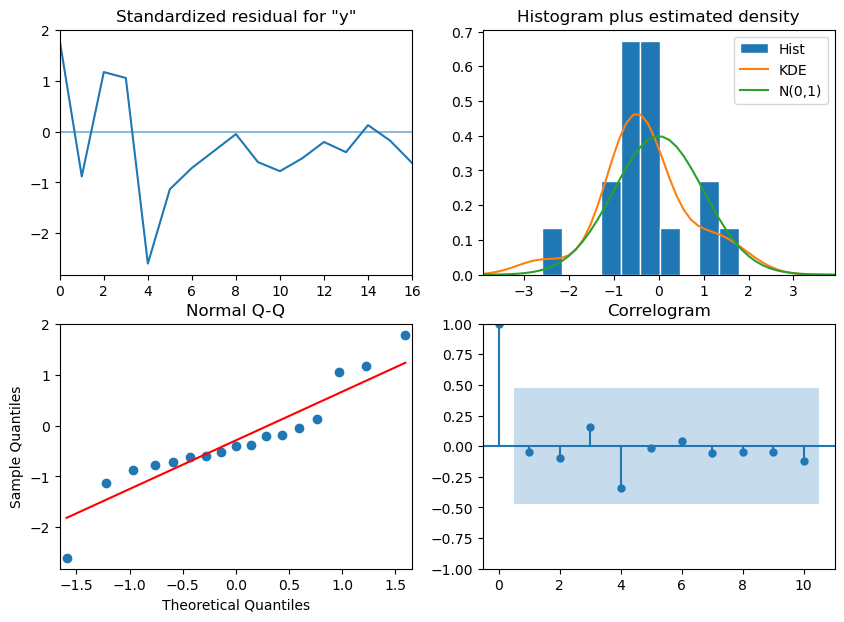

In [30]:
# Production Industry & ARIMA (2)

train_grouped_X_production, test_grouped_X_production = grouped_X_production[0:int(len(grouped_X_production)*0.9)], grouped_X_production[int(len(grouped_X_production)*0.9):]
train_grouped_X_production

train_arima = train_grouped_X_production['co2directscope1_intensity']
test_arima = test_grouped_X_production['co2directscope1_intensity']

history = [x for x in train_arima]
y = test_arima

# Make first prediction

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(10,7))
plt.show()


In [ ]:
-------------------------------------------------------------------------

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import OneHotEncoder

# # Set metric_year as the index and sort the data 
# df5_subset.set_index('metric_year', inplace=True)
# df5_subset.sort_index(inplace = True)

# # One-hot encode the 'country_code' column 
# encoder = OneHotEncoder(drop='first', sparse=False)
# country_code_encoded = encoder.fit_transform(df5_subset[['country_code']])
# country_code_df = pd.DataFrame(country_code_encoded, 
#                                index=df5_subset.index, 
#                                columns=encoder.get_feature_names_out(['country_code']))

# # Combine encoded 'country_code' with other exogenous variables
# exog = pd.concat([df5_subset[['revenue', 'industry_type_carbonIntensive']], country_code_df], axis=1)

# # Prepare the target variable
# endog = df5_subset['co2directscope1_raw']

# Fit the ARIMAX model
model = ARIMA(endog, exog=exog, order=(1, 1, 1))
model_fit = model.fit()

# Display the model summary
model_summary = model_fit.summary()
model_summary

/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/slee/opt/anaconda3/envs/CS6750_CDA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     co2directscope1_raw   No. Observations:                18274
Model:                  ARIMA(1, 1, 1)   Log Likelihood             -417853.158
Date:                 Thu, 11 Jul 2024   AIC                         835828.316
Time:                         00:24:21   BIC                         836304.920
Sample:                              0   HQIC                        835984.930
                               - 18274                                         
Covariance Type:                   opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
revenue                         114.0696      1.920     59.422      0.000     110.307     117.832
industry_type_carbonIntensive  1.543e+09   2.34e-08   6.58e+16      0.000    1.54e+09    1.54e+09
country_code_AU                2.642e+08   1.74e-09   1.52e+17      0.000    2.64e+08    2.64e+08
country_code_BE                1.749e+08   4.24e-10   4.12e+17      0.000    1.75e+08    1.75e+08
country_code_BM                 2.41e+08   1.14e-10   2.12e+18      0.000    2.41e+08    2.41e+08
country_code_BR                5.879e+08    8.3e-10   7.08e+17      0.000    5.88e+08    5.88e+08
country_code_CA                3.752e+08   2.17e-09   1.73e+17      0.000    3.75e+08    3.75e+08
country_code_CH                6.597e+08   2.05e-09   3.22e+17      0.000     6.6e+08     6.6e+08
country_code_CL                8.801e+08   1.11e-10   7.91e+18      0.000     8.8e+08     8.8e+08
country_code_CN                6.481e+08   3.89e-11   1.67e+19      0.000    6.48e+08    6.48e+08
country_code_CO               -1.541e+08   6.77e-11  -2.28e+18      0.000   -1.54e+08   -1.54e+08
country_code_CW               -9.486e+08   3.81e-11  -2.49e+19      0.000   -9.49e+08   -9.49e+08
country_code_CY                7.066e+08   3.47e-11   2.03e+19      0.000    7.07e+08    7.07e+08
country_code_CZ                2.679e+09   4.33e-11   6.19e+19      0.000    2.68e+09    2.68e+09
country_code_DE                9.794e+08   6.97e-09    1.4e+17      0.000    9.79e+08    9.79e+08
country_code_DK                4.496e+08   6.73e-10   6.68e+17      0.000     4.5e+08     4.5e+08
country_code_ES                7.482e+08   1.35e-09   5.56e+17      0.000    7.48e+08    7.48e+08
country_code_FI                2.902e+08   8.71e-10   3.33e+17      0.000     2.9e+08     2.9e+08
country_code_FR                8.368e+08   1.73e-09   4.82e+17      0.000    8.37e+08    8.37e+08
country_code_GB                4.101e+08   2.64e-09   1.55e+17      0.000     4.1e+08     4.1e+08
country_code_GR                1.579e+09   4.06e-10   3.89e+18      0.000    1.58e+09    1.58e+09
country_code_HK                2.132e+09   2.11e-09   1.01e+18      0.000    2.13e+09    2.13e+09
country_code_HR                9.242e+08    1.8e-11   5.13e+19      0.000    9.24e+08    9.24e+08
country_code_HU                5.244e+08   9.11e-11   5.76e+18      0.000    5.24e+08    5.24e+08
country_code_ID               -8.144e+05   1.02e-10  -8.01e+15      0.000   -8.14e+05   -8.14e+05
country_code_IE                1.085e+08   5.59e-10   1.94e+17      0.000    1.08e+08    1.08e+08
country_code_IL               -1.121e+08   6.85e-11  -1.64e+18      0.000   -1.12e+08   -1.12e+08
country_code_IN                2.599e+09   3.13e-09    8.3e+17      0.000     2.6e+09     2.6e+09
country_code_IT                1.157e+09   1.33e-09   8.72e+17      0.000    1.16e+09    1.16e+09
country_code_JE               -2.929e+08   1.27e-10   -2.3e+18      0.000   -2.93e+08   -2.93e+0

In [33]:
# Note that All Team Members have to consolidate their code into a single file
# And modularize based on the sections
# e.g. Marshall on Lasso Regression had subsetted and dropped the data for feature selection
# e.g. Sinnie has added columns to characterise 155 businesses into energy correlations (production- vs service-industry)

# This notebook considers the 'INDUSTRY CHARACTERISTICS'

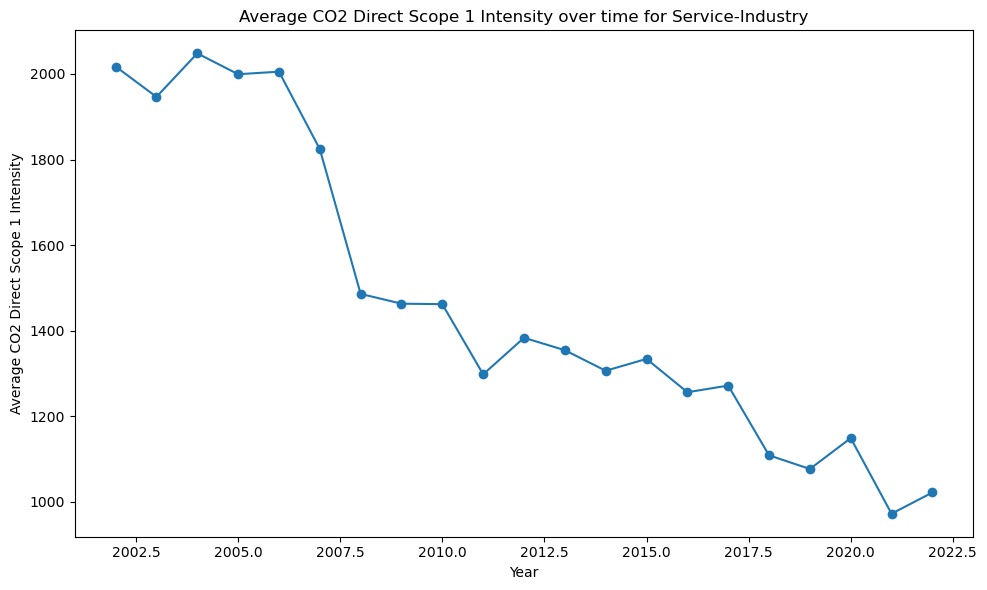

In [34]:
# Service Industry & ARIMA (1)
# Only keep the year and avg of co2directscope1_intensity

grouped_X_service = X_service.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()

# plot the time series
plt.figure(figsize=(10,6))
plt.plot(grouped_X_service['metric_year'], grouped_X_service['co2directscope1_intensity'],marker ='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average CO2 Direct Scope 1 Intensity')
plt.title('Average CO2 Direct Scope 1 Intensity over time for Service-Industry')

# Show the plot
plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -105.059
Date:                Thu, 11 Jul 2024   AIC                            214.119
Time:                        00:24:29   BIC                            215.785
Sample:                             0   HQIC                           214.284
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1486      0.418      0.355      0.722      -0.671       0.968
sigma2       1.36e+04   7249.042      1.877      0.061    -602.939    2.78e+04
Ljung-Box (L1) (Q):                   0.80   Jarque-

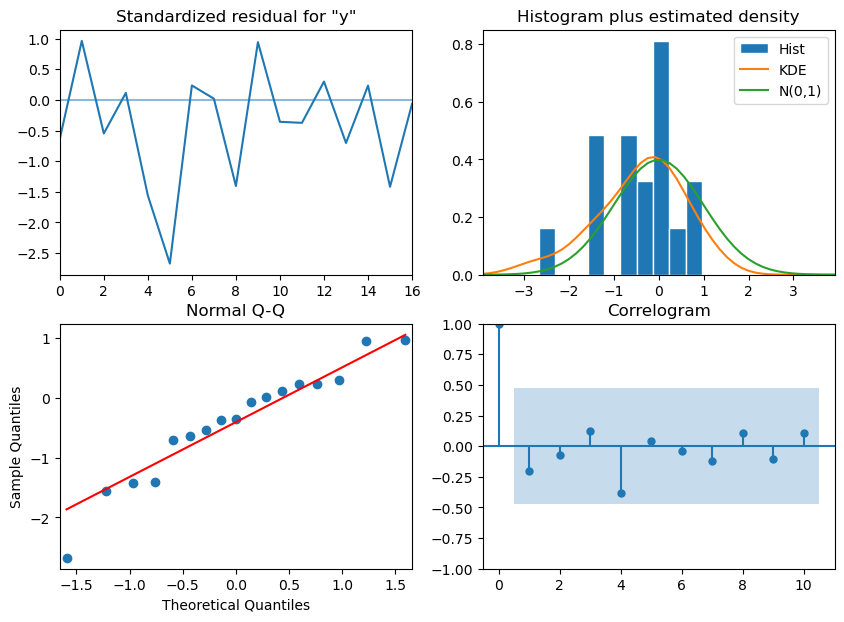

In [35]:
# Service Industry & ARIMA (2)

train_grouped_X_service, test_grouped_X_service = grouped_X_service[0:int(len(grouped_X_service)*0.9)], grouped_X_service[int(len(grouped_X_service)*0.9):]
train_grouped_X_service

train_arima = train_grouped_X_service['co2directscope1_intensity']
test_arima = test_grouped_X_service['co2directscope1_intensity']

history = [x for x in train_arima]
y = test_arima

# Make first prediction

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(10,7))
plt.show()


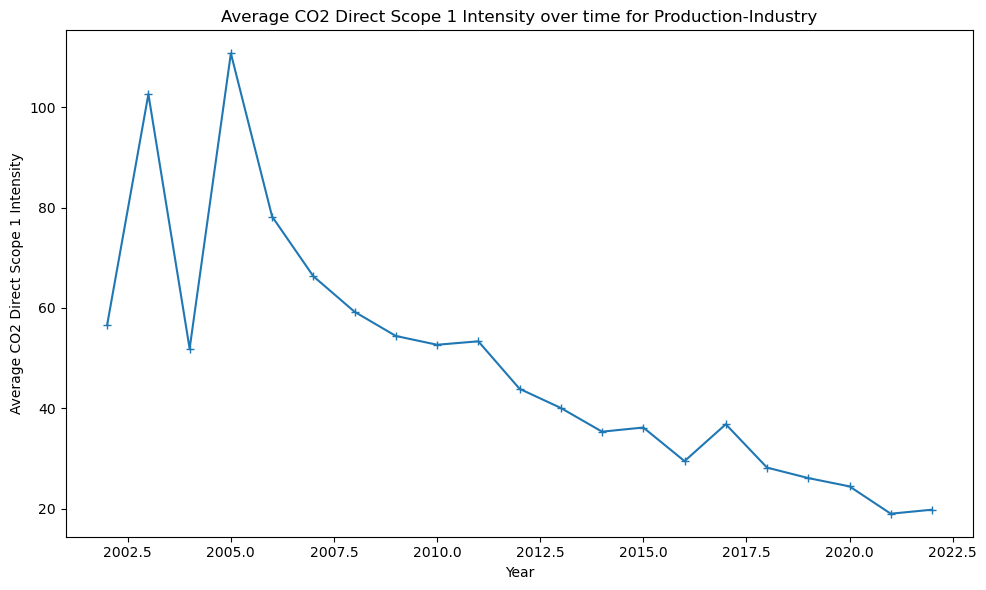

In [36]:
# Production Industry & ARIMA 
# Only keep the year and avg of co2directscope1_intensity

grouped_X_production = X_production.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()

# plot the time series
plt.figure(figsize=(10,6))
plt.plot(grouped_X_production['metric_year'], grouped_X_production['co2directscope1_intensity'], marker ='+')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average CO2 Direct Scope 1 Intensity')
plt.title('Average CO2 Direct Scope 1 Intensity over time for Production-Industry')

# Show the plot
plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -70.528
Date:                Thu, 11 Jul 2024   AIC                            145.057
Time:                        00:24:39   BIC                            146.723
Sample:                             0   HQIC                           145.223
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8182      0.103     -7.960      0.000      -1.020      -0.617
sigma2       220.1240     68.765      3.201      0.001      85.348     354.900
Ljung-Box (L1) (Q):                   0.05   Jarque-

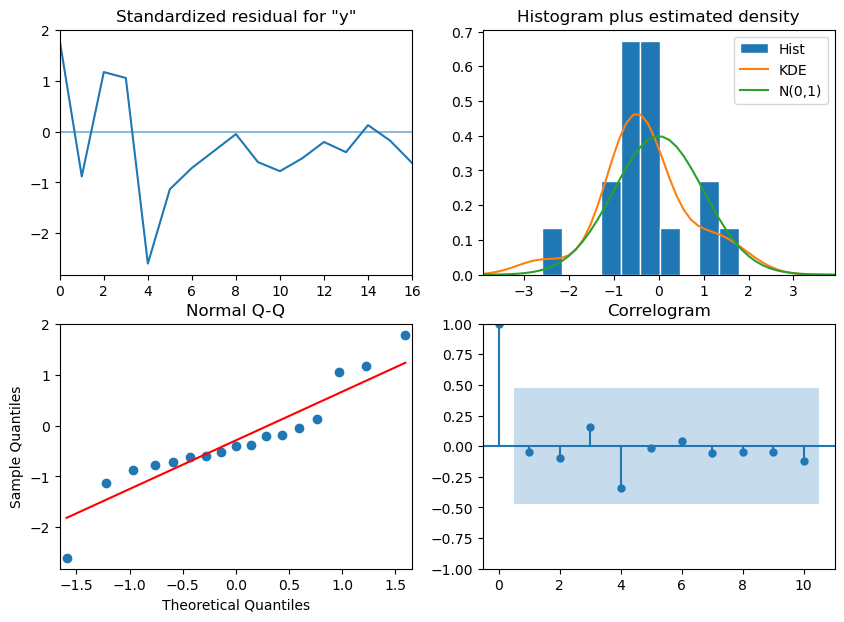

In [37]:
# Production Industry & ARIMA (2)

train_grouped_X_production, test_grouped_X_production = grouped_X_production[0:int(len(grouped_X_production)*0.9)], grouped_X_production[int(len(grouped_X_production)*0.9):]
train_grouped_X_production

train_arima = train_grouped_X_production['co2directscope1_intensity']
test_arima = test_grouped_X_production['co2directscope1_intensity']

history = [x for x in train_arima]
y = test_arima

# Make first prediction

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(10,7))
plt.show()


In [38]:
# XGBoost: https://www.youtube.com/watch?v=vV12dGe_Fho
# Prophet 1: https://www.youtube.com/watch?v=hht0iKzviWE
# Prophet 2: https://www.youtube.com/watch?v=j0eioK5edqg&t=864s
# Prophet 3: https://towardsdatascience.com/getting-started-predicting-time-series-data-with-facebook-prophet-c74ad3040525

# LSTM: https://www.youtube.com/watch?v=c0k-YLQGKjY
# AR: https://www.youtube.com/watch?v=Ia9irWcWt8s
# Seasonality: https://www.youtube.com/watch?v=Lh9LY5YoH0I&list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP
